1.  	Dataset yang digunakan untuk mengklasifikasi gambar apa ?
Jawab : Klasifikasi gambar daun, bunga dan sayur
2.  	Sebutkan jumlah image pada masing – masing kelas ?
Jawab : 240 Image
3.  	Dataset dibagi menjadi berapa Folder dan berapa jumlah masing -  masing ?
Jawab : 80 Image per Folder
4.  	Berapa Batch size yang digunakan ?
Jawab : 32
5.  	Image dataset diubah menjadi ukuran berapa sebelum dilakukan convolution ?
Jawab : 220 220
6.  	Berapa jumlah iterasi yang digunakan ?
Jawab : 162
7.  	sebutkan augmentasi apa saja yang dilakukan dalam pipeline source code yang anda kerjakan ?
Jawab : zoom, rescale, geser,rotasi, width_shift_range,horizontal flip dan height_shift_range
8.  	sebutkam model layer yang digunakan pada tugas anda ?
Jawab : Conv2D,Drop Out, AveragePooling2D dan MaxPooling2D
9.  	optimizer yang digunakan pada tugas anda ?
Jawab : Adam
10.   Berapa total parameter yang digunakan dan parameter yang ditrain ?
Jawab : 5 Parameter
11.   Sebutkan accuracy dan loss pada epoch terakhir ?
Jawab : 0.9375
12.   Sebutkan accuracy yang tertinggi dan epoch ke berapa ?
Jawab : 0.9375, epoch ke 68
13.   Apakah prediksi gambar yang dilakukan sudah benar ?
Jawab : Benar

**Eksperimen**
-        No 1
-        80% train : 10% val : 10% test,  => 0.6875,
-        70% train : 15% val : 15% test, => 0.9375,
-        80% train : 20% val, => 0.9375,
-        70% train : 30% => 0.8281,

-        No 2 Augmentasi Data => zoom, rescale, geser,rotasi, width_shift_range,horizontal flip dan height_shift_range => 0.8571

-        No 3 Batch Size
-           - Batch Size = 20(1.0000)
-           - Batch Size = 50(0.8442)

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sn

import cv2
from random import randint

import numpy as np

In [2]:
CLASSES, gems = [], [] # names of classes, count of images for each class

for root, dirs, files in os.walk('../input/deeplearningtim17gami/IMAGE CLASIFICATION BUNGA DAUN SAYUR/TEST'):
    f = os.path.basename(root)    # get class name - Amethyst, Onyx, etc    
        
    if len(files) > 0:
        gems.append(len(files))
        if f not in CLASSES:
            CLASSES.append(f) # add folder name
    
    # uncomment this block if you want a text output about each subfolder
    #count_dirs = 0
    #for f in dirs:           # count subfolders
        #count_dirs += 1
    #depth = root.split(os.sep)
    #print((len(depth) - 2) * '--'+'>', '{}:\t {} folders, {} imgs'.format(os.path.basename(root), count_dirs, gems[-1] if gems!=[] else 0)) 
    
gems_count = len(CLASSES) # 87 = number of classes
print('{} classes with {} images in total'.format(len(CLASSES), sum(gems)))

3 classes with 240 images in total


In [3]:
img_w, img_h = 220, 220    # width and height of image
train_dir = '../input/deeplearningtim17gami/IMAGE CLASIFICATION BUNGA DAUN SAYUR/TEST'

In [4]:
def read_imgs_lbls(_dir):
    Images, Labels = [], []
    for root, dirs, files in os.walk(_dir):
        f = os.path.basename(root)  # get class name - Amethyst, Onyx, etc       
        for file in files:
            Labels.append(f)
            try:
                image = cv2.imread(root+'/'+file)              # read the image (OpenCV)
                image = cv2.resize(image,(int(img_w*1.5), int(img_h*1.5)))       # resize the image (images are different sizes)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converts an image from BGR color space to RGB
                Images.append(image)
            except Exception as e:
                print(e)
    Images = np.array(Images)
    return (Images, Labels)

In [5]:
def get_class_index(Labels):
    for i, n in enumerate(Labels):
        for j, k in enumerate(CLASSES):    # foreach CLASSES
            if n == k:
                Labels[i] = j
    Labels = np.array(Labels)
    return Labels

In [6]:
Train_Imgs, Train_Lbls = read_imgs_lbls(train_dir)
Train_Lbls = get_class_index(Train_Lbls)
print('Shape of train images: {}'.format(Train_Imgs.shape))
print('Shape of train labels: {}'.format(Train_Lbls.shape))

Invalid SOS parameters for sequential JPEG


Shape of train images: (240, 330, 330, 3)
Shape of train labels: (240,)


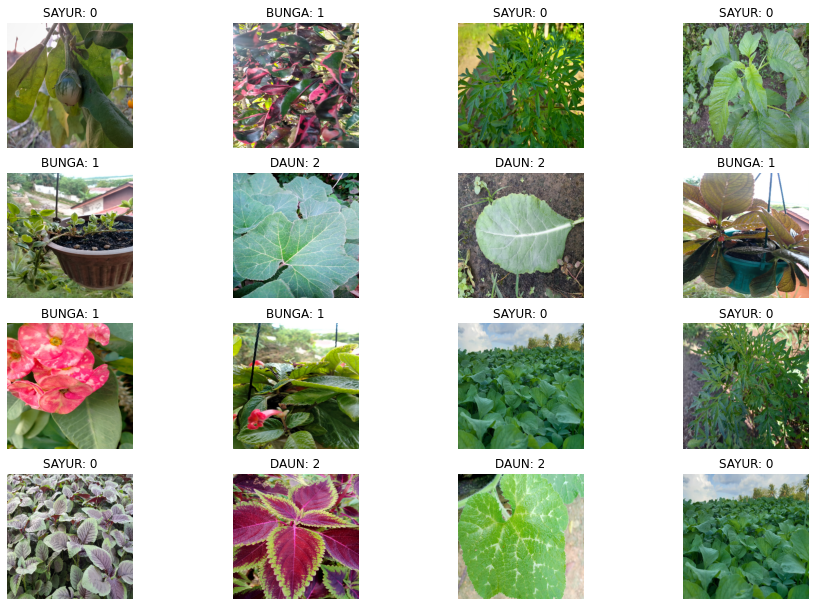

In [7]:
dim = 4 #you can change it;  4x4 dimension flat plot

f,ax = plt.subplots(dim,dim) 
f.subplots_adjust(0,0,2,2)
for i in range(0,dim):
    for j in range(0,dim):
        rnd_number = randint(0,len(Train_Imgs))
        cl = Train_Lbls[rnd_number]
        ax[i,j].imshow(Train_Imgs[rnd_number])
        ax[i,j].set_title(CLASSES[cl]+': ' + str(cl))
        ax[i,j].axis('off')

In [8]:
def edge_and_cut(img):
    try:
        edges = cv2.Canny(img, img_w, img_h)            
        
        if(np.count_nonzero(edges)>edges.size/10000):           
            pts = np.argwhere(edges>0)
            y1,x1 = pts.min(axis=0)
            y2,x2 = pts.max(axis=0)
            
            new_img = img[y1:y2, x1:x2]           # crop the region
            new_img = cv2.resize(new_img,(img_w, img_h))  # Convert back
        else:
            new_img = cv2.resize(img,(img_w, img_h))
    
    except Exception as e:
        print(e)
        new_img = cv2.resize(img,(img_w, img_h))
    
    return new_img

In [9]:
def show_cropped(img):
    emb_img = img.copy()
    edges = cv2.Canny(img, img_w, img_h)
    
    if(np.count_nonzero(edges)>edges.size/10000):
        pts = np.argwhere(edges>0)
        y1,x1 = pts.min(axis=0)
        y2,x2 = pts.max(axis=0)

        new_img = img[y1:y2, x1:x2]  

        edge_size = 1 #replace it with bigger size for larger images            

        emb_img[y1-edge_size:y1+edge_size, x1:x2] = [255, 0, 0]
        emb_img[y2-edge_size:y2+edge_size, x1:x2] = [255, 0, 0]
        emb_img[y1:y2, x1-edge_size:x1+edge_size] = [255, 0, 0]
        emb_img[y1:y2, x2-edge_size:x2+edge_size] = [255, 0, 0]

        new_img = cv2.resize(new_img,(img_w, img_h))  # Convert to primary size  
        
    else:
        new_img = cv2.resize(img,(img_w, img_h))
    
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original Image', fontsize=14)
    ax[1].imshow(edges, cmap='gray')
    ax[1].set_title('Canny Edges', fontsize=14)
    ax[2].imshow(emb_img, cmap='gray')
    ax[2].set_title('Bounding Box', fontsize=14)       
    ax[3].imshow(new_img, cmap='gray')
    ax[3].set_title('Cropped', fontsize=14)   

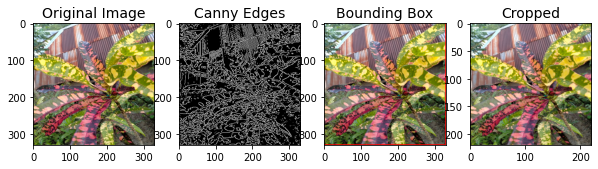

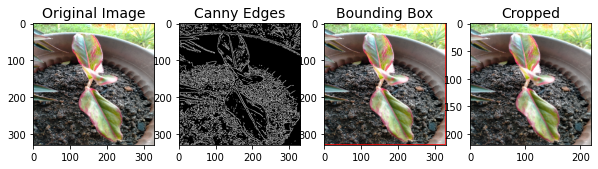

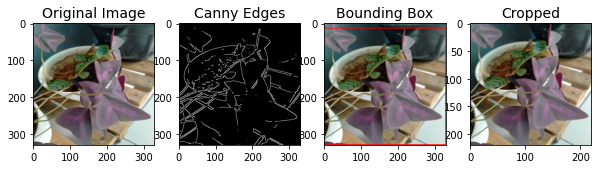

In [10]:
for x in range(0,3):
    show_cropped(Train_Imgs[randint(0,len(Train_Imgs))])

In [11]:
def crop_images(Imgs):
    CroppedImages = np.ndarray(shape=(len(Imgs), img_w, img_h, 3), dtype=np.int)

    ind = 0
    for im in Imgs: 
        x = edge_and_cut(im)
        CroppedImages[ind] = x
        ind += 1

    return CroppedImages

In [12]:
Train_Imgs = crop_images(Train_Imgs)
print('Final shape of images in train set: {} '.format(Train_Imgs.shape))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Final shape of images in train set: (240, 220, 220, 3) 


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Train_Imgs, Train_Lbls, shuffle = True, test_size = 0.15, random_state = 42)
print('Shape of X_train: {}, y_train: {} '.format(X_train.shape, y_train.shape))
print('Shape of X_val: {}, y_val: {} '.format(X_val.shape, y_val.shape))

Shape of X_train: (204, 220, 220, 3), y_train: (204,) 
Shape of X_val: (36, 220, 220, 3), y_val: (36,) 


In [14]:
from tensorflow.python.client import device_lib
devices = device_lib.list_local_devices()
print(devices)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1140484975411041117
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16152002560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2674086138065515621
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


2022-06-23 13:16:30.102264: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-23 13:16:30.136191: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 13:16:30.145938: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 13:16:30.146781: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers

In [16]:
filters = 32      # the dimensionality of the output space
kernel_size = 3   # length of the 2D convolution window
max_pool = 2      # size of the max pooling windows

In [17]:
EPOCHS = 162                                  # while testing you can change it
batch_size = 32                            # number of training samples using in each mini batch during GD (gradient descent) 
iter_per_epoch = len(X_train) // batch_size  # each sample will be passed [iter_per_epoch] times during training
val_per_epoch = len(X_val) // batch_size     # each sample will be passed [val_per_epoch] times during validation

In [18]:
model = Sequential()

# first layer
model.add(Conv2D(batch_size, (kernel_size, kernel_size), activation='relu', padding='same', input_shape=(img_w, img_h, 3))) # 32
model.add(MaxPooling2D((max_pool, max_pool))) #reduce the spatial size of incoming features

# second layer
model.add(Conv2D(2*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 64
model.add(MaxPooling2D((max_pool, max_pool))) 

# third layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(MaxPooling2D((max_pool, max_pool))) 

# fourth layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(AveragePooling2D(pool_size= (2, 2), strides= (2, 2))) 

# fifth layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(MaxPooling2D((max_pool, max_pool))) 

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(16*batch_size, activation='relu'))                                             # 512
model.add(Dense(87, activation='softmax'))
model.summary()

2022-06-23 13:16:30.957909: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 128)       1

2022-06-23 13:16:30.958935: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 13:16:30.959764: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 13:16:30.961004: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 13:16:30.961869: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 13:16:30.962652: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(              # this is the augmentation configuration used for training
        rotation_range=25,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        horizontal_flip=True
        )

val_datagen = ImageDataGenerator(
rotation_range=25,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        horizontal_flip=True)                # for val/testing only rescaling function 

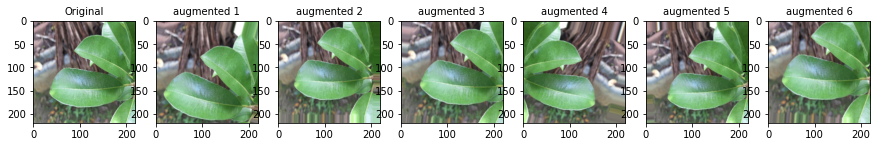

In [21]:
n = randint(0,len(X_train))
samples = np.expand_dims(X_train[n], 0)
it = train_datagen.flow(samples, batch_size=batch_size)
cols = 7

fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(15, 10))
ax[0].imshow(X_train[n], cmap='gray')
ax[0].set_title('Original', fontsize=10)

for i in range(1,cols):
    batch = it.next()    # generate batch of images 
    image = batch[0].astype('uint32') # convert to unsigned int for viewing
    ax[i].set_title('augmented {}'.format(i), fontsize=10)
    ax[i].imshow(image, cmap='gray')

In [22]:
train_gen = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_gen = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
earstop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
cekmodel = ModelCheckpoint(filepath='model.hdf5',monitor='val_loss',mode='min',verbose=1,save_best_only=True)

In [24]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.92):
      print("\nAkurasi di atas 90%, hentikan training!")
      self.model.stop_training = True
        
stop = myCallback()

In [25]:
m = model.fit_generator(
       train_gen,
       steps_per_epoch= iter_per_epoch,
       epochs=162,
       validation_data = val_gen,
       validation_steps = val_per_epoch,
       verbose = 2,
       callbacks = [cekmodel]
       )

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-06-23 13:16:32.890378: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/162


2022-06-23 13:16:34.431275: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


6/6 - 6s - loss: 18.6985 - accuracy: 0.3256 - val_loss: 4.9287 - val_accuracy: 0.3438

Epoch 00001: val_loss improved from inf to 4.92866, saving model to model.hdf5
Epoch 2/162
6/6 - 2s - loss: 2.4148 - accuracy: 0.3663 - val_loss: 1.3660 - val_accuracy: 0.2812

Epoch 00002: val_loss improved from 4.92866 to 1.36604, saving model to model.hdf5
Epoch 3/162
6/6 - 2s - loss: 1.1489 - accuracy: 0.4709 - val_loss: 1.0156 - val_accuracy: 0.5625

Epoch 00003: val_loss improved from 1.36604 to 1.01561, saving model to model.hdf5
Epoch 4/162
6/6 - 3s - loss: 1.0203 - accuracy: 0.5104 - val_loss: 0.9610 - val_accuracy: 0.5000

Epoch 00004: val_loss improved from 1.01561 to 0.96100, saving model to model.hdf5
Epoch 5/162
6/6 - 2s - loss: 1.0154 - accuracy: 0.5233 - val_loss: 0.7737 - val_accuracy: 0.7188

Epoch 00005: val_loss improved from 0.96100 to 0.77369, saving model to model.hdf5
Epoch 6/162
6/6 - 2s - loss: 0.9038 - accuracy: 0.5698 - val_loss: 0.9316 - val_accuracy: 0.5625

Epoch 00006:

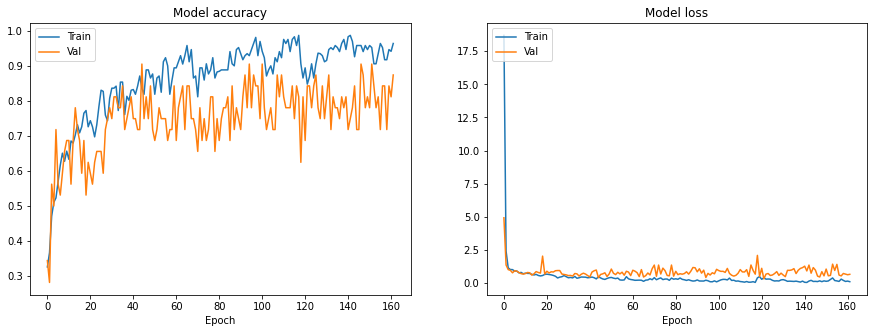

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].plot(m.history['accuracy'])
axs[0].plot(m.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].legend(['Train', 'Val'], loc='upper left')

axs[1].plot(m.history['loss'])
axs[1].plot(m.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].legend(['Train', 'Val'], loc='upper left')

for ax in axs.flat:
    ax.set(xlabel='Epoch')

In [27]:
score = model.evaluate_generator(val_gen, steps= len(val_gen))

for idx, metric in enumerate(model.metrics_names):
    print('{}:{}'.format(metric, score[idx]))

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


loss:0.7210642695426941
accuracy:0.8055555820465088


<AxesSubplot:>

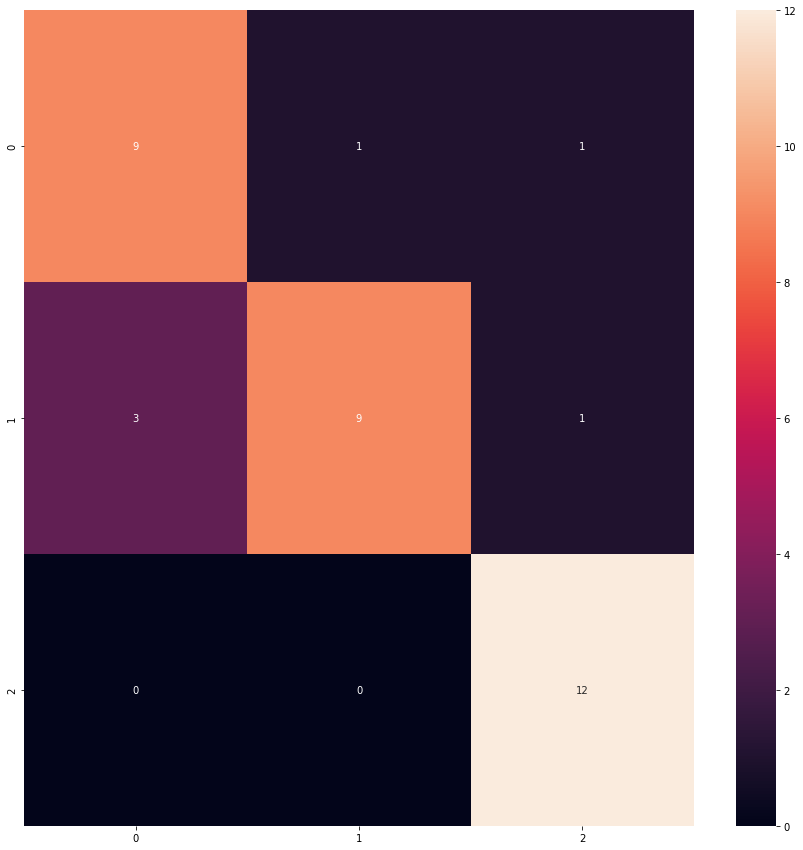

In [28]:
from sklearn.metrics import confusion_matrix
y_pre_test=model.predict(X_val)
y_pre_test=np.argmax(y_pre_test,axis=1)
cm=confusion_matrix(y_val,y_pre_test)

plt.figure(figsize = (15,15))
sn.heatmap(cm, annot=True)

In [29]:
class_names = CLASSES

1


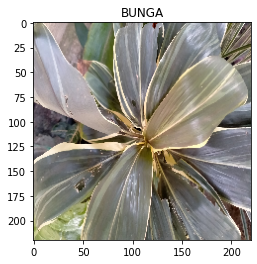

1


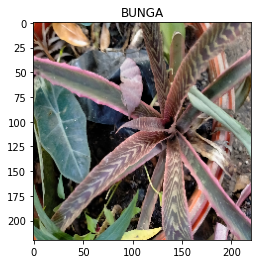

1


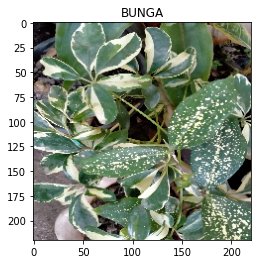

1


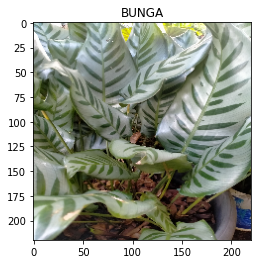

1


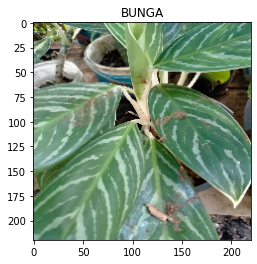

1


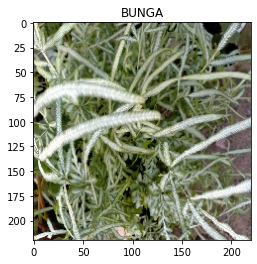

1


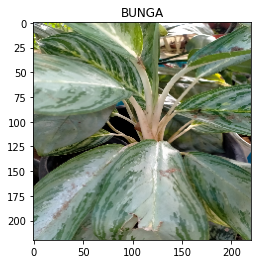

1


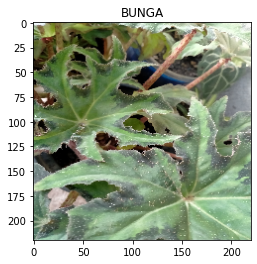

1


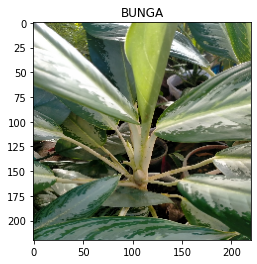

1


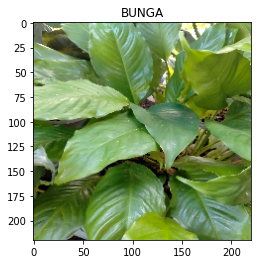

In [30]:
testes = '../input/deeplearningtim17gami/IMAGE CLASIFICATION BUNGA DAUN SAYUR/TRAIN/BUNGA'
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = os.listdir(testes)
path = []
for fn in uploaded:
  path.append(fn)

for obj in path:
  patoh = os.path.join(testes,obj)
  img = image.load_img(patoh, target_size=(img_w, img_h))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=batch_size)
  class_index = np.argmax(classes)
  class_indeks = int(class_index)
  pred = class_names[class_indeks]
  print(class_indeks)
  plt.imshow(img)
  plt.title(pred)
  plt.show()

2


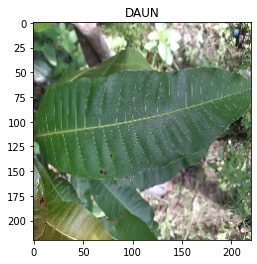

0


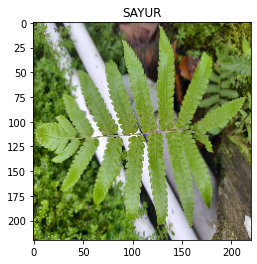

2


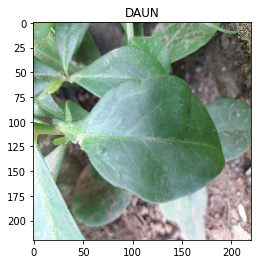

0


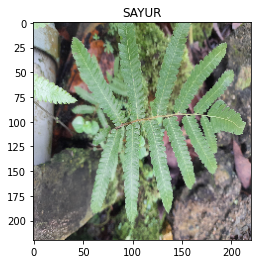

2


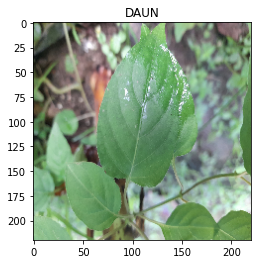

2


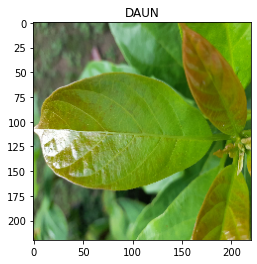

2


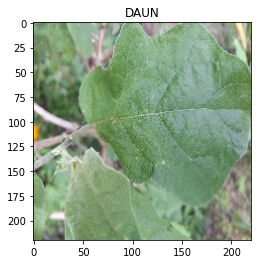

2


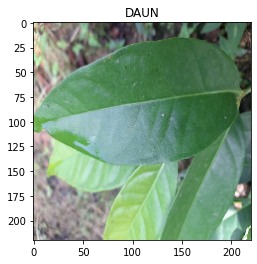

2


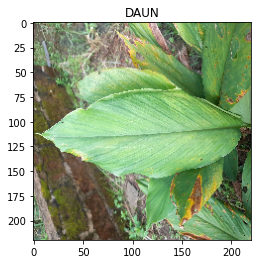

2


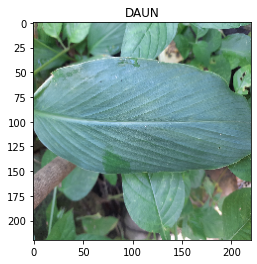

In [31]:
testes = '../input/deeplearningtim17gami/IMAGE CLASIFICATION BUNGA DAUN SAYUR/TRAIN/DAUN'
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = os.listdir(testes)
path = []
for fn in uploaded:
  path.append(fn)

for obj in path:
  patoh = os.path.join(testes,obj)
  img = image.load_img(patoh, target_size=(img_w, img_h))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=batch_size)
  class_index = np.argmax(classes)
  class_indeks = int(class_index)
  pred = class_names[class_indeks]
  print(class_indeks)
  plt.imshow(img)
  plt.title(pred)
  plt.show()

0


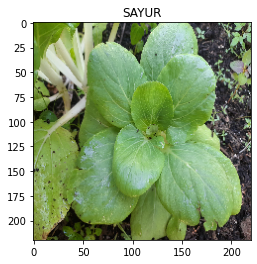

0


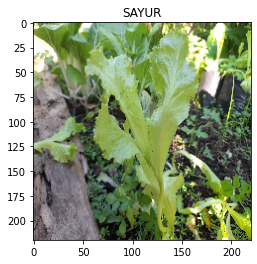

0


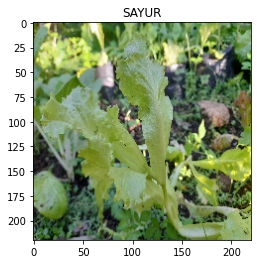

0


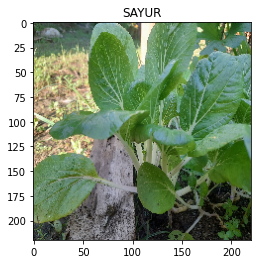

0


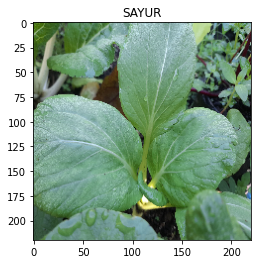

0


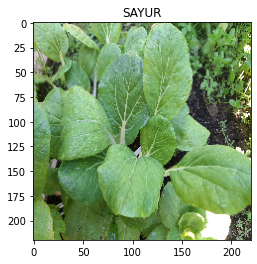

0


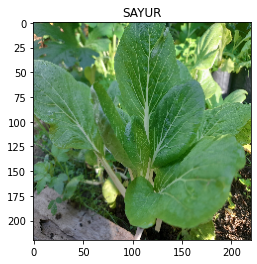

0


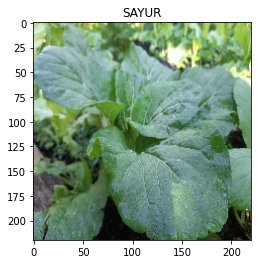

2


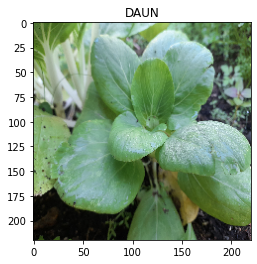

0


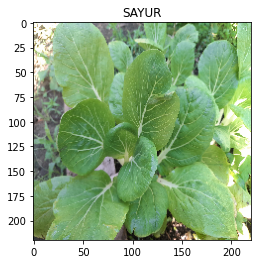

In [32]:
testes = '../input/deeplearningtim17gami/IMAGE CLASIFICATION BUNGA DAUN SAYUR/TRAIN/SAYUR'
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = os.listdir(testes)
path = []
for fn in uploaded:
  path.append(fn)

for obj in path:
  patoh = os.path.join(testes,obj)
  img = image.load_img(patoh, target_size=(img_w, img_h))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=batch_size)
  class_index = np.argmax(classes)
  class_indeks = int(class_index)
  pred = class_names[class_indeks]
  print(class_indeks)
  plt.imshow(img)
  plt.title(pred)
  plt.show()

In [33]:
model.save('model_daun_sayur_buah.h5')